# EDMD-DL Tests on Duffing Oscillator

## Train the Model

Import necessary modules

In [1]:
import sys
sys.path.append('..')
import KoopmanDL as kdl
import torch
import matplotlib.pyplot as plt

Generate the data set

In [2]:
alpha = 1.0
beta = -1.0
delta = 0.5
dt = 1e-3
n_init = 1300
traj_len = 10
traj_t_step = 0.25
x_min = -2
x_max = 2
seed = 0
n_train = 10000
n_valid = 3000

duffing = kdl.DuffingOscillator(alpha, beta, delta)
flowmap = kdl.ForwardEuler(dt)
data_x_all = flowmap.generate_traj_data(duffing, n_init, traj_len, traj_t_step, x_min, x_max, seed)
data_y_all = flowmap.step(duffing, data_x_all)
dataset = kdl.DataSet(data_x_all, data_y_all)
data_train, data_valid = dataset.split(n_train)

Visualize train data

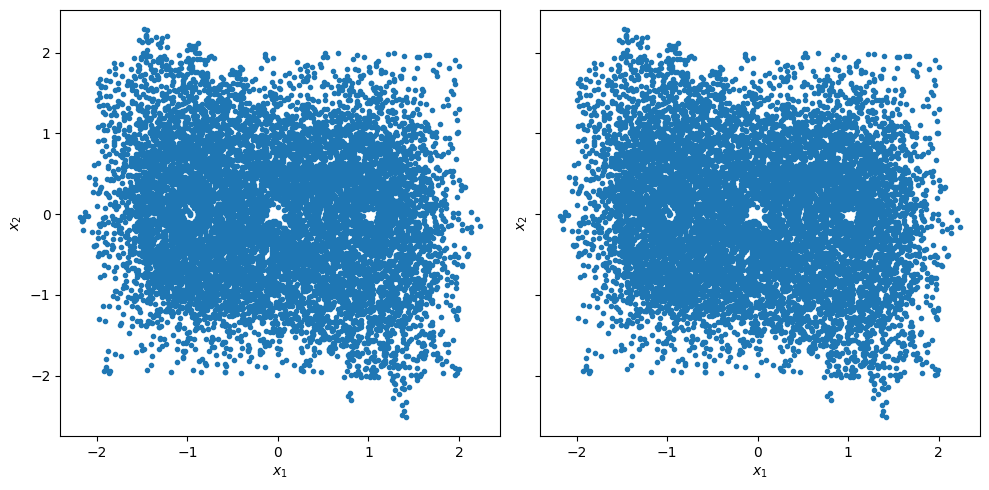

In [3]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
data_x_train = data_train.data()
ax1.plot(data_x_train[:,0], data_x_train[:,1], '.')
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
data_y_train = data_train.labels()
ax2.plot(data_y_train[:,0], data_y_train[:,1], '.')
ax2.set_xlabel(r'$x_{1}$')
ax2.set_ylabel(r'$x_{2}$')
plt.tight_layout()

Visualize validation data

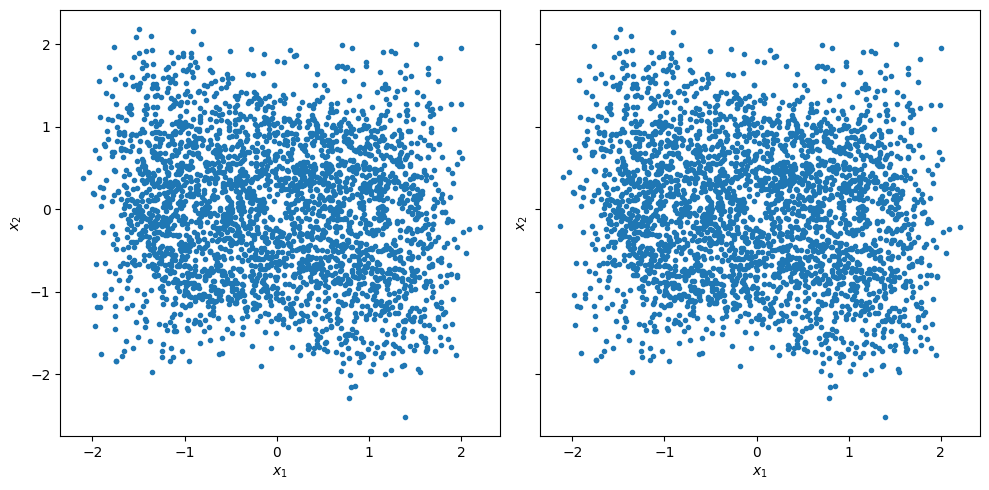

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
data_x_valid = data_valid.data()
ax1.plot(data_x_valid[:,0], data_x_valid[:,1], '.')
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
data_y_valid = data_valid.labels()
ax2.plot(data_y_valid[:,0], data_y_valid[:,1], '.')
ax2.set_xlabel(r'$x_{1}$')
ax2.set_ylabel(r'$x_{2}$')
plt.tight_layout()

Build up the solver

In [5]:
D = 2
M = 25
non_trainables = D + 1
hidden_layer_sizes = [100, 100, 100]
lr = 1e-4
reg = 0.1
num_epochs = 3000
batch_size = 5000


net = kdl.TanhNetWithNonTrainable(D, M, hidden_layer_sizes, non_trainables)
opt = torch.optim.Adam(net.parameters(), lr)
dic = kdl.TrainableDictionary(M, net, opt)
solver = kdl.EDMDDLSolver(dic, reg)
solver.solve(data_x_train, data_y_train, 1e-10, num_epochs, batch_size)

epoch: 0, loss: 9.947128631893065e-08
epoch: 1, loss: 9.943207146534405e-08
epoch: 2, loss: 9.939307688000554e-08
epoch: 3, loss: 9.935426703577832e-08
epoch: 4, loss: 9.931586220091049e-08
epoch: 5, loss: 9.927775579399167e-08
epoch: 6, loss: 9.923989097160302e-08
epoch: 7, loss: 9.920239563143696e-08
epoch: 8, loss: 9.916524845721142e-08
epoch: 9, loss: 9.912845655435376e-08
epoch: 10, loss: 9.909196307944512e-08
epoch: 11, loss: 9.905581066504965e-08
epoch: 12, loss: 9.901994957317584e-08
epoch: 13, loss: 9.898450059608876e-08
epoch: 14, loss: 9.894934294152335e-08
epoch: 15, loss: 9.891453345289847e-08
epoch: 16, loss: 9.888010055192353e-08


KeyboardInterrupt: 

## Prediction

In [ ]:
traj_len = 50